In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
sns.set(style='white')
sns.set(style = 'whitegrid',color_codes=True)
import os

import warnings
warnings.simplefilter(action='ignore')

In [4]:
os.listdir()

['.DS_Store',
 'TI3203_Computer_Simulation_W3_Random_number_variate_part_1.pdf',
 'random number.ipynb',
 '~$W3_Simkom_dataset.xlsx',
 '.ipynb_checkpoints',
 'W3_Simkom_HW1_indv.xlsx',
 'W3_Simkom_dataset.xlsx']

# 1. Generate Random Variate

### 1.1 Linear Congruential Generator

In [4]:
def lcg(a,c,seed,m,size):
#     for param in [a,c,seed]:
#         assert param<m

    Z, U = [seed], [None]
    for i in range(size):
        z = (a*Z[i]+c)%m
        Z.append(z)
        U.append(z/(m-1))
    
    return Z,U

In [5]:
Z,U = lcg(21,3,13,16,100000)

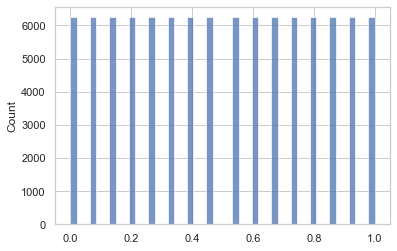

In [7]:
f, ax = plt.subplots()
sns.histplot(U[1:], ax=ax) # note that the first entry in U is None.
plt.show()

### 1.2 Exponential Distribution

In [198]:
# Exponential PDF
def exp_pdf(x, beta, cum=False):
    x = np.array(x)
    if cum:
        return 1-np.exp(-x/beta) # cdf
    return (1/beta)*np.exp(-x/beta) # pdf

# Inverse (see handwork on paper)
def inv_exp_pdf(p, beta, cum=False):
    p = np.array(p)
    if cum: 
        return -beta*np.log(1-p) # cdf
    return -beta*(np.log(beta*p)) # pdf


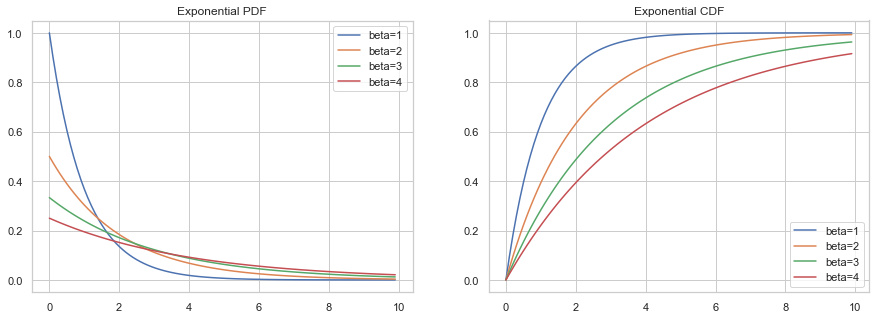

In [168]:
f , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
x = np.arange(0,10,0.1)

for beta in np.arange(1,5,1):
    ax1.plot(x, exp_pdf(x,beta), label=f'beta={beta}')
    ax2.plot(x, exp_pdf(x,beta,True), label=f'beta={beta}')

ax1.set_title('Exponential PDF')
ax1.legend()
ax2.set_title('Exponential CDF')
ax2.legend()

plt.show()

### 1.3 Transform Inverse

Now we would like to see whether inverse tranformation would work on both CDF and PDF. We do this by substituting the previously generated random numbers (LCG) into the inverse exponential function for CDF and PDF.

In [208]:
rv_results_pdf = inv_exp_pdf(U[1:], 1, False)
rv_results_cdf = inv_exp_pdf(U[1:], 1, True)


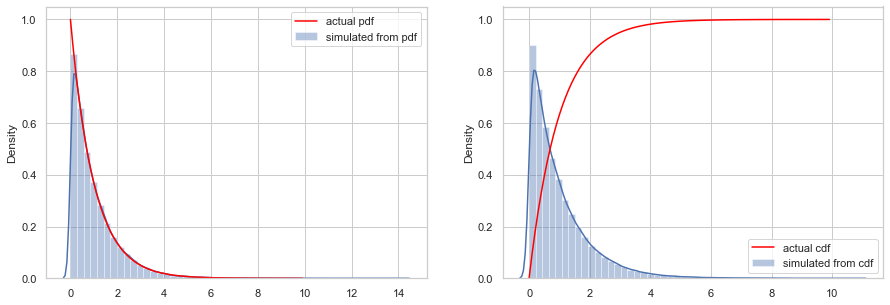

In [213]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
x = np.arange(0,10,0.1)

sns.distplot(rv_results_pdf, ax=ax1, label='simulated from pdf')
ax1.plot(x, exp_pdf(x,1,False), label='actual pdf', color='red')

sns.distplot(rv_results_cdf, ax=ax2, label='simulated from cdf')
ax2.plot(x, exp_pdf(x,1,True), label='actual cdf', color='red')

ax1.legend()
ax2.legend()
plt.show()

Works both ways it seems.

# 2. Import Data

In [9]:
dataset = pd.read_excel('W3_Simkom_dataset.xlsx', sheet_name='Dataset', engine='openpyxl')
random_number = pd.read_excel('W3_Simkom_dataset.xlsx', sheet_name='Random number', engine='openpyxl')

In [14]:
dataset = dataset.iloc[:,:2]
dataset.columns = ['i','arrival (minutes at)']

In [15]:
display(dataset, random_number)

,i,arrival (minutes at)
0,1,0.066731
1,2,1.902893
2,3,2.105952
3,4,14.831737
4,5,18.008131
...,...,...
95,96,413.735727
96,97,418.074482
97,98,418.865504
98,99,421.107969


,i,Random number
0,1,0.788371
1,2,0.616722
2,3,0.409931
3,4,0.207842
4,5,0.296110
...,...,...
95,96,0.929795
96,97,0.012619
97,98,0.653552
98,99,0.562409


# Play around

### Dataset

In [40]:
dataset['inter_arrival_t'] = dataset['arrival (minutes at)']-dataset['arrival (minutes at)'].shift(1).fillna(0)
dataset.head()

,i,arrival (minutes at),inter_arrival_t
0,1,0.066731,0.066731
1,2,1.902893,1.836163
2,3,2.105952,0.203059
3,4,14.831737,12.725784
4,5,18.008131,3.176394


In [41]:
dataset.describe()

,i,arrival (minutes at),inter_arrival_t
count,100.000000,100.000000,100.000000
mean,50.500000,212.991215,4.225697
std,29.011492,125.643976,3.827698
min,1.000000,0.066731,0.066731
25%,25.750000,106.788680,1.461762
50%,50.500000,215.871929,3.176394
75%,75.250000,317.166467,5.878760
max,100.000000,422.569731,12.725784


In [60]:
maximum, minimum = dataset['inter_arrival_t'].max(), dataset['inter_arrival_t'].min()
bins = np.linspace(0,maximum,8) # 7 classes / intervals

# create bins
classes = pd.cut(dataset['inter_arrival_t'], bins)

In [63]:
dataset.groupby(classes).size()

inter_arrival_t
(0.0, 1.818]        34
(1.818, 3.636]      23
(3.636, 5.454]      11
(5.454, 7.272]      11
(7.272, 9.09]       10
(9.09, 10.908]       0
(10.908, 12.726]    11
dtype: int64

In [64]:
sns.barplot()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

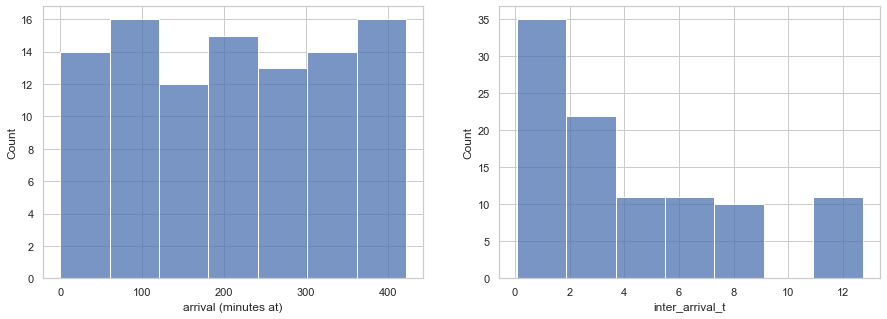

In [44]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

#
bins = int(1+3.3*np.log10(len(dataset)))

# plot
sns.histplot(dataset['arrival (minutes at)'], ax=ax1, bins=bins)
sns.histplot(dataset['inter_arrival_t'], ax=ax2, bins=bins)

plt.show()

### Random number

In [38]:
random_number.describe()

,i,Random number
count,100.000000,100.000000
mean,50.500000,0.499301
std,29.011492,0.303669
min,1.000000,0.012619
25%,25.750000,0.216308
50%,50.500000,0.486908
75%,75.250000,0.791135
max,100.000000,0.976471


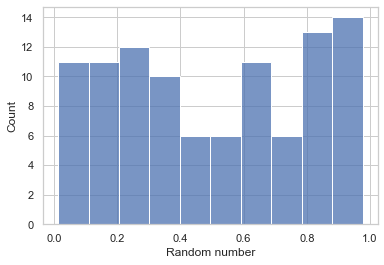

In [37]:
sns.histplot(random_number['Random number'], bins=10)

plt.show()